# Author: Husam Abdelrahim
## Project 1

# Alaska vs AM West - Airline Delay Analysis

## Introduction
This analysis is basically to examine the flight delay that is be ing occured with Alaska and AM west across the 5 destination that provided, So the goal of the project is to basically compare the performance and understand the delay rate and see if we can identify the patterns or insights 

## Data Descriptions
- **airline**: the name of the airline that we are working with is ALASKA - AM WEST
- ** destination**. The destination that is provided for this project is going to be Los Angeles, Phoenix, San Diego, Sanfrancisco, and then we have seattle
- **status**. Flight status while is basically on time or delayed
- **count**. The status of the flights (num of flights)

The focus is that we are going to perform calcualtion of delay of % each airline at the destination and comparting to understand the airline performance

In [45]:
import pandas as pd # using pandas for this project is important to manipulate the data
import matplotlib.pyplot as plt # using matplotlib is important to basically 

# Starting off 

In [46]:
# For the first step we are going to be creating a data set 
data = {
    'airline': ['ALASKA'] * 10 + ['AM WEST'] * 10,
    'destination': ['Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle'] * 4,
    'status': ['on time'] * 5 + ['delayed'] * 5 + ['on time'] * 5 + ['delayed'] * 5,
    'count': [
        # ALASKA on-time
        497, 221, 212, 503, 1841,
        # ALASKA delayed
        62, 12, 20, 102, 305,
        # AM WEST on-time
        694, 4840, 383, 320, 201,
        # AM WEST delayed
        117, 415, 65, 129, 61
    ]
}

## Methodology
these are the steps that we are going to follow after our dataset creation 
1. we will create a dataset that is structured and basically with the provided information that we have we will work with that.
2. after we have created a dataset there should be an existing file of the csv and we are going to utilize pandas in this situation
3. No we are going to calcuate with what the metrics is providing:
- the total flights of airline pair
- delay percentages of each desination pair of the airline 

In [47]:
# we are now going to create a initial DataFrame
df = pd.DataFrame(data)

In [48]:
# In this part we are going to be saving the csv file  the index false will basically ensure the dataframe is not written to the file
df.to_csv('airline_delays.csv', index=False)
print("CSV file created: airline_delays.csv")

# it's going to read from the csv file and print out if it was successful or not! 
df = pd.read_csv('airline_delays.csv')
print("\nData read from CSV file successfully")

CSV file created: airline_delays.csv

Data read from CSV file successfully


In [49]:
# In this section we are going to calcuate and it groups the data frame with airline and destination and extracting the count column
df['total_flights'] = df.groupby(['airline', 'destination'])['count'].transform('sum')
df['delay_percent'] = df.apply(
    lambda row: (row['count'] / row['total_flights']) * 100 # it will calculate the percentage that is presented of the delayed flights for certain rows that is displayed here 
    if row['status'] == 'delayed' else None, 
    axis=1
)


Analysis Results:

ALASKA Delay Statistics:
-------------------------
Los Angeles: 11.1% delayed (62 of 559 flights)
Phoenix: 5.2% delayed (12 of 233 flights)
San Diego: 8.6% delayed (20 of 232 flights)
San Francisco: 16.9% delayed (102 of 605 flights)
Seattle: 14.2% delayed (305 of 2146 flights)

AM WEST Delay Statistics:
-------------------------
Los Angeles: 14.4% delayed (117 of 811 flights)
Phoenix: 7.9% delayed (415 of 5255 flights)
San Diego: 14.5% delayed (65 of 448 flights)
San Francisco: 28.7% delayed (129 of 449 flights)
Seattle: 23.3% delayed (61 of 262 flights)


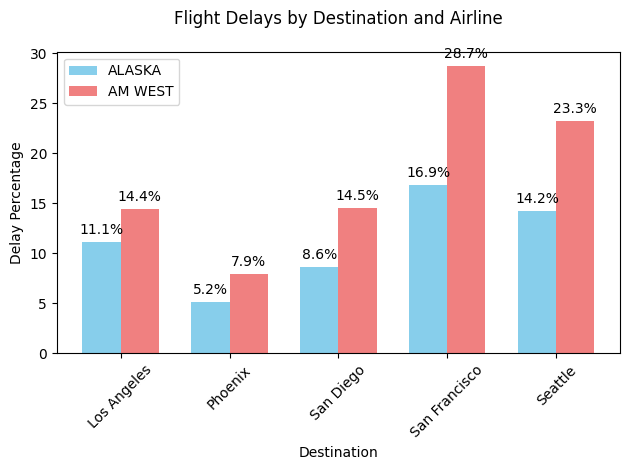

<Figure size 1200x600 with 0 Axes>

In [50]:
# we will be printing the analysis result in this code just a quick side note I had my analysis on a different cell however it didn't look properly so putting the codes together in one cell with the results and the visualization is much better in my opinion and my preference. 

print("\nAnalysis Results:") # printing a header for the analysis that we are going to dive in 
print("================")
for airline in df['airline'].unique(): # it will be getting a list of airline for the DataFrame 
    delayed_data = df[(df['airline'] == airline) & (df['status'] == 'delayed')]  #airline is basically equaling to the current loop of the airline provided but the status is basically will equal delayed 
    print(f"\n{airline} Delay Statistics:")
    print("-------------------------")
    for _, row in delayed_data.iterrows(): #Iterates of each row that is filtered 
        print(f"{row['destination']}: {row['delay_percent']:.1f}% delayed "
              f"({row['count']} of {row['total_flights']} flights)")

def plot_comparison(df):
    plt.figure(figsize=(12, 6))    

# This is going to be the filter for the delayed flight of the alaska data and the amwest data 
alaska_data = df[
        (df['airline'] == 'ALASKA') & 
        (df['status'] == 'delayed')
    ].set_index('destination')['delay_percent']
    
amwest_data = df[
        (df['airline'] == 'AM WEST') & 
        (df['status'] == 'delayed')
    ].set_index('destination')['delay_percent']
    
x_labels = alaska_data.index
x = range(len(x_labels))
width = 0.35
# In this section we are going to add bars for the visualization provided 
plt.bar([i - width/2 for i in x], alaska_data, 
            width, label='ALASKA', color='skyblue')
plt.bar([i + width/2 for i in x], amwest_data, 
            width, label='AM WEST', color='lightcoral')
    
    # this customize the plot 
plt.title('Flight Delays by Destination and Airline', pad=20)
plt.xlabel('Destination')
plt.ylabel('Delay Percentage')
plt.xticks(x, x_labels, rotation=45)
plt.legend()
    
    # we are not woing to be adding the value to our bars for the visualization 
for i, v in enumerate(alaska_data):
        plt.text(i - width/2, v + 0.5, f'{v:.1f}%', 
                ha='center', va='bottom')
for i, v in enumerate(amwest_data):
        plt.text(i + width/2, v + 0.5, f'{v:.1f}%', 
                ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

# Create the visualization and presenting the results 
plot_comparison(df)

## Analysis Results

### The statsics of the delay with Airline and the destination


#### Obsering Alaska Airline Delay Stats:

- Los Angeles: 11.1% delayed (62 of 559 flights)
- Phoenix: 5.2% delayed (12 of 233 flights)
- San Diego: 8.6% delayed (20 of 232 flights)
- San Francisco: 16.9% delayed (102 of 605 flights)
- Seattle: 14.2% delayed (305 of 2146 flights)

#### Obsering AM WEST Airline Delay Stats:

- Los Angeles: 14.4% delayed (117 of 811 flights)
- Phoenix: 7.9% delayed (415 of 5255 flights)
- San Diego: 14.5% delayed (65 of 448 flights)
- San Francisco: 28.7% delayed (129 of 449 flights)
- Seattle: 23.3% delayed (61 of 262 flights)

# Key Obseravtions

1. **Overall Results Presented** As we can see that ALASKA has better performance in all desinations that is being presented as we can see that AM West is lower in terms of the delay 

2. **Destination-Patterns Observation** 
- In San Francisco we can see that both airlines there is a bit of spike jump like for AM West it's 28.7% but Alaska is basically 16.9%
- In Phoenix we see that there is a much smaller delay for both of the air lines that is provided Alaska airline standing at 8.6% and AM West 14.5%

- Overall for this section AM West has a highter delay result 

3. **Volume differences between the two flights**
- We see that Alaska operates mmost flights that is heading to Seatle
- While AM West tend to have more flights heading to Phoenix
- Because of the volumes between the airline it can of course impact the rates of delay and the efficiency of the airlines services 

## Conclusions

After working on this project what we know for sure is that 

1. **Airline Performances** ALASKA tends to continue to perform way bet tha nAM west it comes down to arriving to the destiantion where as ALASKA does have a fewer lower percentage of flight delayed compared to AM West

2. We know that even by looking at thing in certain geographical ways no matter what san franciso tends to have mroe traffic and delays and we can make up some story about the ttraffic control

3. Both airlines shows their attributes such as lowest delay rates and we can see ALASKA perfroms much better in Seattle and AM West performs way better in Phoenix

4. Clients & Customer who are seeking on time performance will prefer ALASKA airline and especially when flying out to certain states like San Francisco or Seattle